In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
## Load the file and merge the data
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_data_df = city_data_df.drop_duplicates('city', keep = 'first')
city_ride_data_df = city_data_df.merge(ride_data_df,on="city")

# Display the data table for preview
city_ride_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [15]:
## Group the data by city name
# Group the data by city name
city_ride_group_by_city = city_ride_data_df.groupby('city')

# Average Fare calculated by city
avg_fare_by_city = city_ride_group_by_city['fare'].mean()

# Riding Count calculated by city
ride_count_by_city = city_ride_group_by_city['ride_id'].count()

# Drivers Count calculated by city
driver_count_by_city = city_ride_group_by_city['driver_count'].first()

# city type data
city_type = city_ride_group_by_city['type'].first()

# dataframe from above series
city_ride_analysis_df = pd.DataFrame({
    "Average Fare ($) Per City": avg_fare_by_city,
    "Total Number of Rides Per City": ride_count_by_city,
    "Total Number of Drivers Per City": driver_count_by_city,
    "City Type": city_type
})
city_ride_analysis_df.head()

,Average Fare ($) Per City,Total Number of Rides Per City,Total Number of Drivers Per City,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [16]:
## Separate Urban, Suburban and Rural cities
city_ride_analysis_urban_df = city_ride_analysis_df[city_ride_analysis_df['City Type']=='Urban']
city_ride_analysis_suburban_df = city_ride_analysis_df[city_ride_analysis_df['City Type']=='Suburban']
city_ride_analysis_rural_df = city_ride_analysis_df[city_ride_analysis_df['City Type']=='Rural']

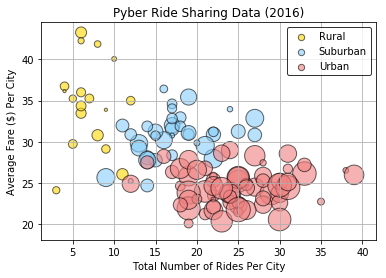

In [17]:
# Color Dictionary 
city_type_color = {'Rural': '#FFD700', 'Suburban': '#87CEFA', 'Urban': '#F08080'}

# plot size
urban_plot_size = city_ride_analysis_urban_df['Total Number of Drivers Per City'] * 8
suburban_plot_size = city_ride_analysis_urban_df['Total Number of Drivers Per City'] * 5
rural_plot_size = city_ride_analysis_urban_df['Total Number of Drivers Per City'] * 2

# Build the scatter plots for each city types
plt.scatter('Total Number of Rides Per City', 'Average Fare ($) Per City', data = city_ride_analysis_rural_df, 
            s = rural_plot_size, color = city_type_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = 0.6)
plt.scatter('Total Number of Rides Per City', 'Average Fare ($) Per City', data = city_ride_analysis_suburban_df, 
            s = suburban_plot_size, color = city_type_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = 0.6)
plt.scatter('Total Number of Rides Per City', 'Average Fare ($) Per City', data = city_ride_analysis_urban_df, 
            s = urban_plot_size, color = city_type_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = 0.6)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare ($) Per City')
plt.grid()
# Create a legend
lgd = plt.legend(frameon = True, edgecolor = 'black')
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]
lgd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size


# Save Figure
plt.savefig("Pyber Ride Sharing Data Bubble Plot.png")

In [7]:
# Show plot
plt.show()

## Data by City Type

In [8]:
# Group by city type
city_ride_analysis_by_type = city_ride_analysis_df.groupby('City Type')

# Total Fares by City Type
total_fares_by_city_type = city_ride_analysis_by_type["Average Fare ($) Per City"].sum()


# Total Rides by City Type
total_rides_by_city_type = city_ride_analysis_by_type["Total Number of Rides Per City"].sum()


# Total Drivers by City Type
total_drivers_by_city_type = city_ride_analysis_by_type["Total Number of Drivers Per City"].sum()

## Total Fares by City Type

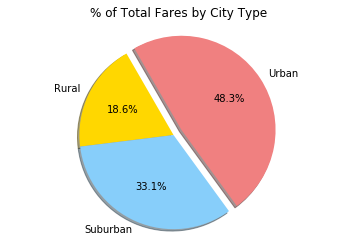

In [9]:
# pie chart Labels
labels = total_fares_by_city_type.index

# Chart Display
colors = [city_type_color[type_name] for type_name in labels]
explode = [0 , 0, .1]
plt.pie(total_fares_by_city_type, startangle = 120, colors = colors, explode = explode, labels = labels,
        autopct = "%1.1f%%", shadow = True)

# Chart Title and Axis
plt.title('% of Total Fares by City Type')
plt.axis('equal')

# Chart save
plt.savefig("Total Fares by City Type.png")

# Plot Show
plt.show()

## Total Rides by City Type

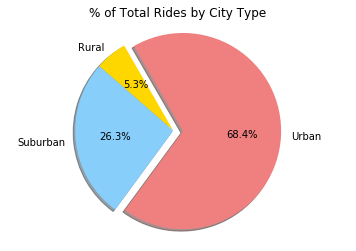

In [12]:
# pie chart Labels
labels = total_rides_by_city_type.index

# Chart Display
colors = [city_type_color[type_name] for type_name in labels]
explode = [0 , 0, .1]
plt.pie(total_rides_by_city_type, startangle = 120, colors = colors, explode = explode, labels = labels,
        autopct = "%1.1f%%", shadow = True)

# Chart Title and Axis
plt.title('% of Total Rides by City Type')
plt.axis('equal')

# Chart save
plt.savefig("Total Rides by City Type.png")

# Plot Show
plt.show()

## Total Drivers by City Type

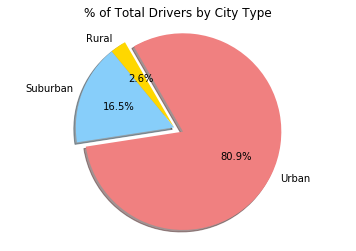

In [13]:
# pie chart Labels
labels = total_drivers_by_city_type.index

# Chart Display
colors = [city_type_color[type_name] for type_name in labels]
explode = [0 , 0, .1]
plt.pie(total_drivers_by_city_type, startangle = 120, colors = colors, explode = explode, labels = labels,
        autopct = "%1.1f%%", shadow = True)

# Chart Title and Axis
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

# Chart save
plt.savefig("Total Drivers by City Type.png")

# Plot Show
plt.show()